In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [3]:
df = pd.read_csv('bank_cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [5]:
from sklearn.model_selection import train_test_split
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [7]:
num_atribute=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

cat_atribute=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'poutcome' , 'month']

In [8]:
le = LabelEncoder()
X_train[cat_atribute] = X_train[cat_atribute].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
X_train[cat_atribute].head()

,job,marital,education,default,housing,loan,poutcome,month
8006,1,1,0,0,1,0,2,6
6900,1,1,1,0,1,1,2,8
19270,3,1,1,0,0,0,2,1
5185,8,1,1,0,0,0,2,8
4791,4,1,2,0,1,0,2,8


In [10]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atribute])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [11]:
a = X_train[cat_atribute]
b = ss.transform(X_train[num_atribute])

Xtr = np.hstack([a,b])
Xtr.shape 

(28588, 15)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [13]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atribute])
le = LabelEncoder()
X_test[cat_atribute] = X_test[cat_atribute].apply(le.fit_transform)
a1 = X_test[cat_atribute]
b1 = ss.transform(X_test[num_atribute])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [14]:
y_pred = knn.predict(Xtr1)

In [15]:
confusion_matrix(y_test, y_pred)

array([[10553,   272],
       [ 1009,   419]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, y_pred)

0.8954541744878806

In [18]:
from sklearn.metrics import precision_recall_fscore_support

In [19]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.91273136, 0.60636758]),
 array([0.97487298, 0.29341737]),
 array([0.94277929, 0.39546956]),
 array([10825,  1428], dtype=int64))

In [20]:
from sklearn.metrics import precision_score

In [21]:
precision_score(y_test, y_pred)

0.6063675832127352

In [22]:
from sklearn.metrics import recall_score

In [23]:
recall_score(y_test, y_pred)

0.2934173669467787

In [24]:
from sklearn.metrics import f1_score

In [25]:
f1_score(y_test, y_pred)

0.39546956111373294

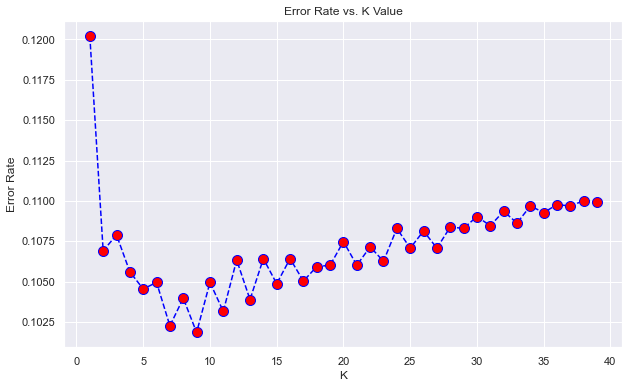

Minimum error:- 0.10185260752468783 at K = 9


In [26]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [28]:
y_pred = knn.predict(Xtr1)

In [29]:
accuracy_score(y_test, y_pred)

0.8981473924753122

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(Xtr, y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atribute])
le = LabelEncoder()
X_test[cat_atribute] = X_test[cat_atribute].apply(le.fit_transform)
a1 = X_test[cat_atribute]
b1 = ss.transform(X_test[num_atribute])

Xtr1 = np.hstack([a1,b1])
Xtr1.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
def initial_check(model,X_train,y_train):
    rmse_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
    r2_score=cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
    print("RMSE (cross_val_score): ",np.sqrt(-rmse_score).mean())
    print("R2 Score (cross_val_score): ",r2_score.mean())

In [40]:
initial_check(reg,Xtr,y_train)

RMSE (cross_val_score):  0.29061157361925405
R2 Score (cross_val_score):  0.15106674900111544


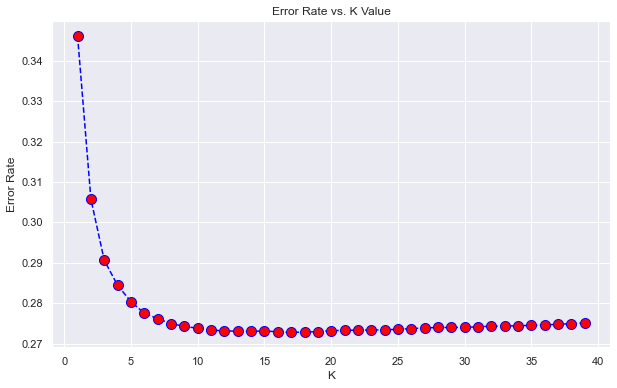

Minimum error:- 0.2727365119972779 at K = 17


In [41]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(Xtr,y_train)
 rmse_score=cross_val_score(knn,Xtr,y_train,scoring='neg_mean_squared_error',cv=10)
 error_rate.append(np.sqrt(-rmse_score).mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)